In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [33]:
fashion_mnist = keras.datasets.fashion_mnist

In [34]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [35]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [36]:
# 배열 변환
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [37]:
# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [38]:
#CNN Model
model = models.Sequential()

In [39]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(3, 3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(3, 3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [46]:
#CNN Model
model2 = models.Sequential()

In [47]:
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D(3, 3))
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(3, 3))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(10, activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
#model compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [48]:
#model compile
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [41]:
# 모델 최적화를 위한 설정 구간
modelpath= './model_storage/MNIST_MLP_3.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,914 (140.29 KB)

 Trainable params: 35,914 (140.29 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,914 (140.29 KB)

 Trainable params: 35,914 (140.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
#model train
history = model.fit(train_images, train_labels, epochs=30, validation_split=0.2, batch_size=200,
                    verbose=1, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/30
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5953 - loss: 1.2843
Epoch 1: val_loss improved from inf to 0.54098, saving model to ./model_storage/MNIST_MLP_3.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5968 - loss: 1.2789 - val_accuracy: 0.8000 - val_loss: 0.5410
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8081 - loss: 0.5184
Epoch 2: val_loss improved from 0.54098 to 0.45788, saving model to ./model_storage/MNIST_MLP_3.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8081 - loss: 0.5183 - val_accuracy: 0.8342 - val_loss: 0.4579
Epoch 3/30
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8421 - loss: 0.4414
Epoch 3: val_loss improved from 0.45788 to 0.43631, saving model to ./model_storage/MNIST_MLP_3.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8422 - loss: 0.4412 - val_accuracy: 0.8429 - val_loss: 0.4363
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8599 - loss: 0.3

In [44]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

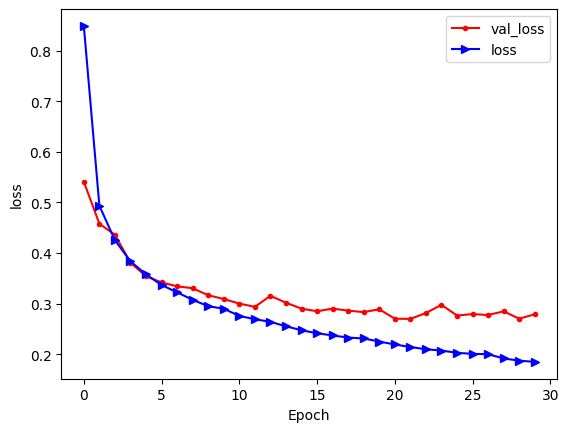

In [45]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="val_loss")
plt.plot(x_len, y_loss, marker='>', c='blue', label="loss")
plt.legend(loc='upper right')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [50]:
#model train
history2 = model.fit(train_images, train_labels, epochs=30, validation_split=0.2, batch_size=200,
                    verbose=1, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/30
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9336 - loss: 0.1780
Epoch 1: val_loss did not improve from 0.27004
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9336 - loss: 0.1781 - val_accuracy: 0.9021 - val_loss: 0.2781
Epoch 2/30
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9348 - loss: 0.1814
Epoch 2: val_loss did not improve from 0.27004
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9348 - loss: 0.1814 - val_accuracy: 0.9047 - val_loss: 0.2761
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9337 - loss: 0.1808
Epoch 3: val_loss did not improve from 0.27004
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9337 - loss: 0.1808 - val_accuracy: 0.9053 - val_loss: 0.2840
Epoch 4/30
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9369 - loss: 0.1720
Epoch 4: val_loss did not improve from 0.27004
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9369 - loss: 0.1720 - val_accuracy: 0.9045 - val_loss:

In [51]:
y_vloss = history2.history['val_loss']
y_loss = history2.history['loss']

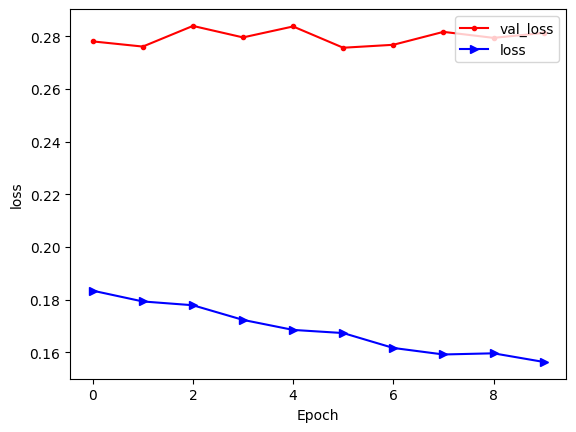

In [52]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="val_loss")
plt.plot(x_len, y_loss, marker='>', c='blue', label="loss")
plt.legend(loc='upper right')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()